# K MEANS

- elbow method to find the correct K

- create the k model
- standardization for a correct K value
- fit the model
- predict the values

In [44]:
# KNN on House Prices
import pandas as pd # for manipulating tabular data
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for user friendly visualisation
import numpy as np # for numerical python functionality

from sklearn.linear_model import LinearRegression # implementation of linear regression
from sklearn.model_selection import train_test_split # for creating a train and test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluating our model

In [45]:
# to scale our data so that we can perform "sensible" clustering
from sklearn.preprocessing import StandardScaler

# to provide an implementation of the k-means algorithm
from sklearn.cluster import KMeans

In [46]:
# ----------------------------------------------------------
# Read and pre-process data
# ----------------------------------------------------------
# Read the data from the csv file into a pandas dataframe 
houses = pd.read_csv('Houseprices.csv')

# Select numerical values for num
houses_num = houses.select_dtypes(include = 'number')

# ----------------------------------------------------------
# Deal with missing values
# ----------------------------------------------------------
# Drop Lot Frontage whicch has the highest missing values
# houses_num.isna().sum().sort_values(ascending=False).head()
houses_num = houses_num.drop('LotFrontage', axis=1)
# Drop all rows containing the remaining missing values 
houses_num = houses_num.dropna()

# ----------------------------------------------------------
# Select the features
# ----------------------------------------------------------

# Select the 9 most highly correlated parameters to be our features- excluding itself
X = houses_num[houses_num.corr()['SalePrice'].abs().sort_values(ascending = False)[1:10].index.to_list()]
# Target variable
y = houses_num["SalePrice"]

# ----------------------------------------------------------
# Train test split
# ----------------------------------------------------------
# Perform a train-test split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state = 42)

# ----------------------------------------------------------
# Build the model : Linear Regression
# ----------------------------------------------------------

# instantiate a model
model = LinearRegression()

# fit the model
model.fit(X, y)

# ----------------------------------------------------------
# Predict : Predict the output using the test set
# ----------------------------------------------------------
# Generate predictions for the test set
y_pred = model.predict(X_test)

# ELBOW METHOD

In [47]:
# Create a list of k values
k_values = list(range(2,15))

# create a scaler object for standardizing the features in the data
scaler = StandardScaler()

# create an array of variances using the inertia function in the K MEans model
variances = [KMeans(k).fit(scaler.fit_transform(X_train)).inertia_ for k in k_values]

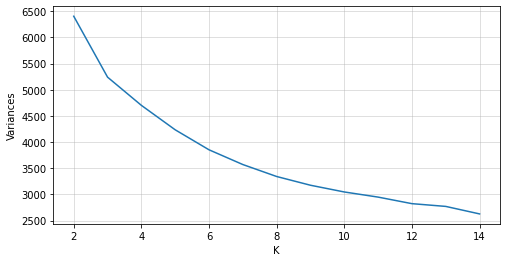

In [48]:
# visualise and look for 'kink' or 'elbow' in the graph
plt.figure(figsize=(8,4))
sns.lineplot(x=k_values, y=variances)
plt.xlabel("K")
plt.ylabel("Variances")
plt.grid(alpha=0.5)
plt.show()

Perhaps a value for k of 5 or 6 would be a sensible choice based on this result although it is somewhat subjective. It is worth noting that there are other, potentially more advanced methods that can also be used to help choose the correct value of k such as the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

In [49]:
# Create the model with 6 clusters
KMeans_model = KMeans(n_clusters=6,random_state=42)

In [50]:
# Fit the Model
KMeans_model.fit(scaler.fit_transform(X_train))

KMeans(n_clusters=6, random_state=42)

In [51]:
# add our cluster labels as a new column to our original training set features
X_train['cluster'] = KMeans_model.labels_
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,cluster
565,6,1647,1,216,806,841,1,6,1915,1
262,6,1212,2,492,506,1212,1,6,1977,0
1090,3,1040,2,400,0,1040,2,6,1950,0
711,4,1178,1,384,859,859,1,7,1900,1
795,6,1564,2,476,650,888,2,7,1980,5


In [52]:
# # plot the predicted price vs residuals
# plt.figure  (figsize=(12, 5))
# plt.scatter(y_train, X_train['cluster'], alpha=1, linewidths=0.5, 
#             edgecolors='black')
# plt.plot([0,600000],[0,0], color='darkred', alpha=0.5)
# plt.xlabel('Predicted SalePrice')
# plt.ylabel('Residual')
# plt.grid(alpha=0.5)
# plt.show()

# Using Clusters to Improve our prediction


In [53]:
# one hot encode the cluster feature as it is a purely categorical feature
X_train = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)

X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
565,6,1647,1,216,806,841,1,6,1915,1,0,0,0,0
262,6,1212,2,492,506,1212,1,6,1977,0,0,0,0,0
1090,3,1040,2,400,0,1040,2,6,1950,0,0,0,0,0
711,4,1178,1,384,859,859,1,7,1900,1,0,0,0,0
795,6,1564,2,476,650,888,2,7,1980,0,0,0,0,1


In [56]:
# create a KMeans class object and choose the number of clusters k
KMeans_model = KMeans(n_clusters = 6, random_state = 123)

# create a scaler object for standardizing the features in the data
scaler = StandardScaler()

# fit the model to our scaled features
KMeans_model.fit(scaler.fit_transform(X_train))

KMeans(n_clusters=6, random_state=123)

In [57]:
# instantiate model class object
model2 = LinearRegression()

# fit model to the training set
model2.fit(X_train, y_train)

# in order to evaluate we must first apply the same steps to our test set as we did for our train set
# let's first predict clusters for each of the data points and add this as a new feature
X_test['cluster'] = KMeans_model.predict(scaler.fit_transform(X_test))

# now let's one-hot encode the new cluster feature 
X_test = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

# use our enhanced model to generate predictions for the test set
preds_test = model2.predict(X_test)

# evaluate how good these predictions are using mae and rmse
mae = mean_absolute_error(y_test, preds_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

C:\Users\Niranjana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 19 features, but LinearRegression is expecting 14 features as input.